In [1]:
#----------------------------------------------------------------------
# Loading libraries
# ----------------------------------------------------------------------
# Dataset libraries
library(boot)
library(rgdal)
library(geojsonR)

# Plotting libraries
library(ggplot2)
library(plotly)
library(gridExtra)
library(grid)
library(png)

# Spatial libraries
library(sp)
library(spatstat)
library(spatial)
library(splancs)

# Statistics library
library(stats)

# Other
library(knitr)
library(dplyr)

Loading required package: sp

rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.2, released 2020/07/07
Path to GDAL shared files: /usr/local/gdal-3.1.2/share/gdal
GDAL binary built with GEOS: FALSE 
Loaded PROJ runtime: Rel. 6.1.0, May 15th, 2019, [PJ_VERSION: 610]
Path to PROJ shared files: /usr/local/proj-6.1.0/share/proj
Linking to sp version:1.4-2
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: spatstat.data

Loading required package: nlme

Loading required package: rpart


spatstat 1.64-1       (nickname: ‘Help you I can, yes!’) 

### 광양읍


In [2]:
cells_rr = ppp(cells$x, cells$y, window = ripras(cells))

In [3]:
충전소 = read.csv("01.광양시_충전기설치현황.csv",header=T)

In [4]:
eub <- c("광양읍","광양읍","중마동","광영동","금호동","광양읍","진월면","태인동",
        "광영동","광양읍","광영동","옥곡면","광양읍","중마동","중마동","광영동",
        "광영동","광양읍","중마동","중마동","광영동","진월면","진월면","진월면",
        "진월면","태인동","광양읍","광양읍","중마동","중마동","중마동","중마동",
        "중마동","중마동","중마동","중마동","중마동","중마동","중마동","광양읍",
        "광양읍","광양읍","광양읍","광양읍")

In [5]:
충전소위치 <- cbind(충전소,eub)

In [6]:
광양읍충전소위치 <- 충전소위치[충전소위치$eub=="광양읍",]
중마동충전소위치 <- 충전소위치[충전소위치$eub=="중마동",]

In [7]:
cp <- cells

In [8]:
cp$n = nrow(광양읍충전소위치)
cp$x = 광양읍충전소위치$lat
cp$y = 광양읍충전소위치$lon
cp$window[[2]] = c(min(광양읍충전소위치$lat)-0.01,max(광양읍충전소위치$lat)+0.01)
cp$window[[3]] = c(min(광양읍충전소위치$lon)-0.01,max(광양읍충전소위치$lon)+0.01)

Warning message:
“data contain duplicated points”


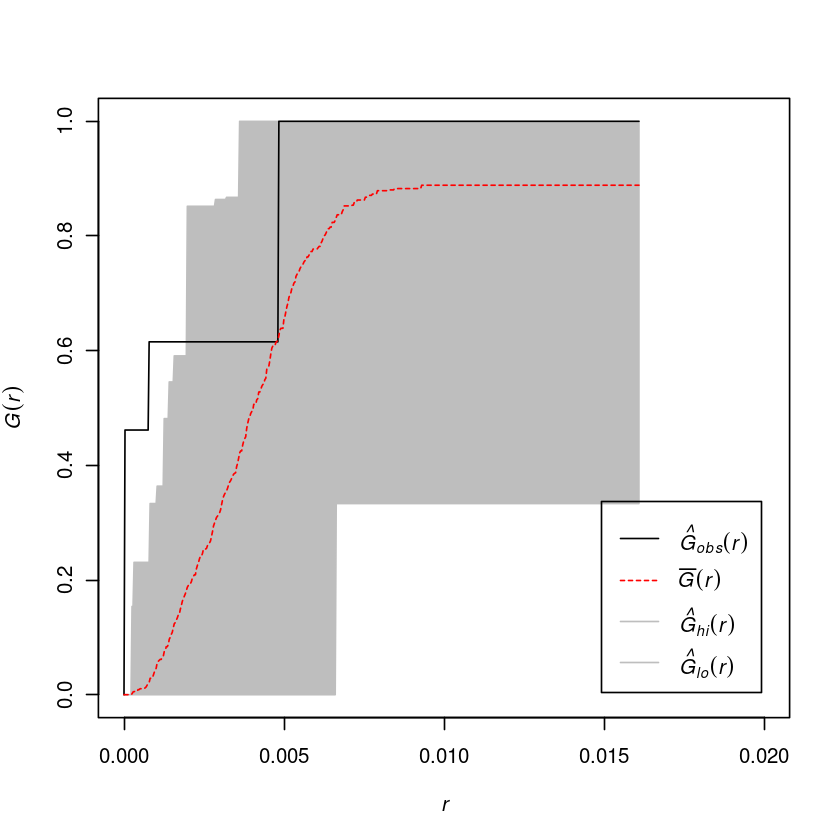

In [9]:
set.seed(123)

# Number points
n = cp$n

# Redwood window
cp_rr = ppp(cp$x, cp$y, window = ripras(cp))

# Creating multiple random point patterns with n points and within the redwood seedling window
ex = expression(runifpoint(n, win = ripras(cp)))

# Calculate the upper and lower boundaries
res = envelope(cp_rr, Gest, nsim = 99, simulate = ex, verbose = FALSE, saveall = TRUE)

plot(res, xlim = c(0, 0.02),main="광양읍 추천 충전소 추가 전")

## ====================================================================

In [10]:
cp2 <- cells

In [11]:
cp2$n = nrow(중마동충전소위치)
cp2$x = 중마동충전소위치$lat
cp2$y = 중마동충전소위치$lon
cp2$window[[2]] = c(min(중마동충전소위치$lat)-0.01,max(중마동충전소위치$lat)+0.01)
cp2$window[[3]] = c(min(중마동충전소위치$lon)-0.01,max(중마동충전소위치$lon)+0.01)

Warning message:
“data contain duplicated points”


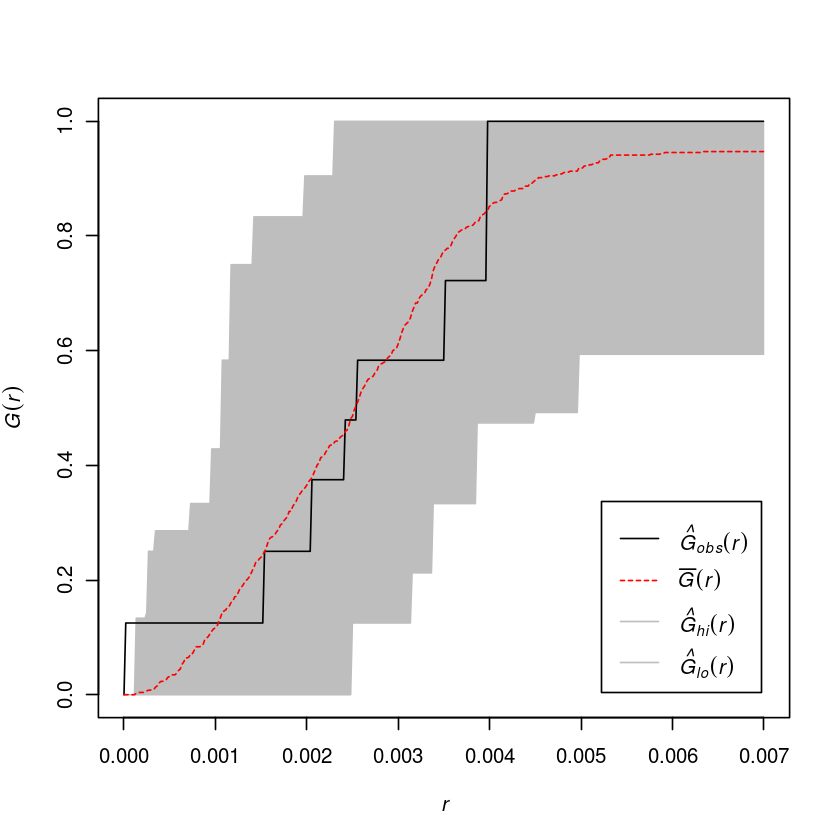

In [12]:
set.seed(123)

# Number points
n = cp2$n

# Redwood window
cp_rr = ppp(cp2$x, cp2$y, window = ripras(cp2))

# Creating multiple random point patterns with n points and within the redwood seedling window
ex = expression(runifpoint(n, win = ripras(cp2)))

# Calculate the upper and lower boundaries
res2 = envelope(cp_rr, Gest, nsim = 99, simulate = ex, verbose = FALSE, saveall = TRUE)

plot(res2, xlim = c(0, 0.007),main="중마동 추천 충전소 추가 전")

## 충전소 추천입지 포함하기

### 광양읍

In [13]:
select <- read.csv("최종선정_읍면동.csv",header=T)
select_광양 <- select %>% filter(읍면동=='광양읍')
select_광양2 <- select_광양[,3:5]
names(select_광양2) <- c("lon","lat","eub")

In [14]:
광양충전소 <- (광양읍충전소위치[,9:11])

In [15]:
광양_후 <- rbind(광양충전소,select_광양2)

In [16]:
cp <- cells

In [17]:
cp$n = nrow(광양_후)
cp$x = 광양_후$lat
cp$y = 광양_후$lon
cp$window[[2]] = c(min(광양_후$lat)-0.01,max(광양_후$lat)+0.01)
cp$window[[3]] = c(min(광양_후$lon)-0.01,max(광양_후$lon)+0.01)

Warning message:
“data contain duplicated points”


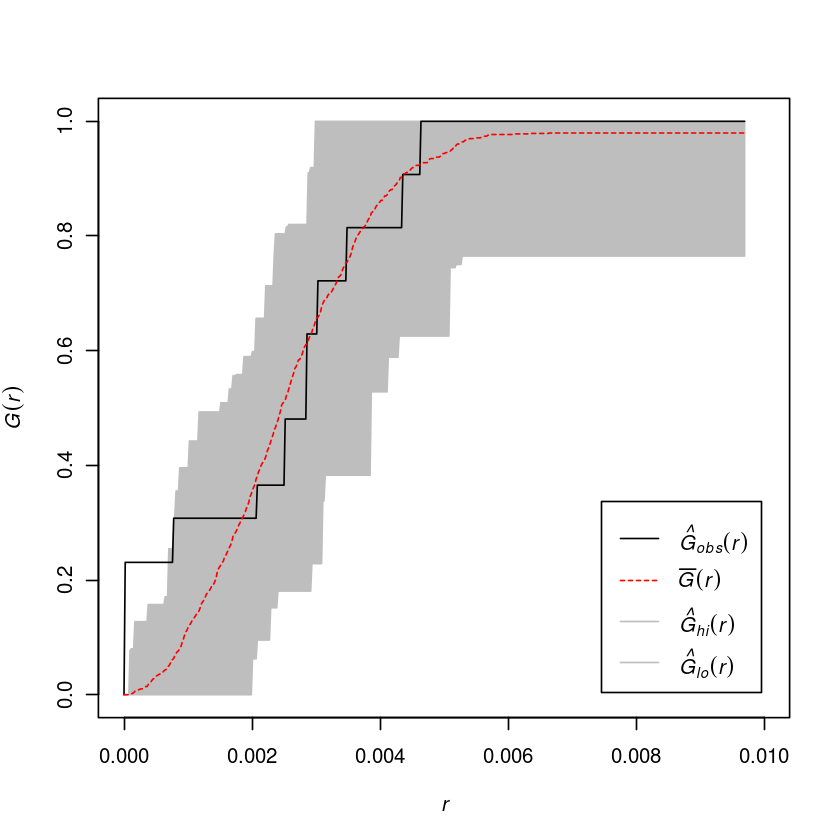

In [18]:
set.seed(123)

# Number points
n = cp$n

# Redwood window
cp_rr = ppp(cp$x, cp$y, window = ripras(cp))

# Creating multiple random point patterns with n points and within the redwood seedling window
ex = expression(runifpoint(n, win = ripras(cp)))

# Calculate the upper and lower boundaries
res = envelope(cp_rr, Gest, nsim = 99, simulate = ex, verbose = FALSE, saveall = TRUE)

plot(res, xlim = c(0, 0.01),main="광양읍 추천 충전소 추가 후")

### 중마동

In [19]:
select <- read.csv("최종선정_읍면동.csv",header=T)
select_중마 <- select %>% filter(읍면동=='중마동')
select_중마2 <- select_중마[,3:5]
names(select_중마2) <- c("lon","lat","eub")

In [20]:
중마충전소 <- (중마동충전소위치[,9:11])

In [21]:
중마_후 <- rbind(중마충전소,select_중마2)

In [22]:
cp2 <- cells

In [23]:
cp2$n = nrow(중마_후)
cp2$x = 중마_후$lat
cp2$y = 중마_후$lon
cp2$window[[2]] = c(min(중마_후$lat)-0.01,max(중마_후$lat)+0.01)
cp2$window[[3]] = c(min(중마_후$lon)-0.01,max(중마_후$lon)+0.01)

Warning message:
“data contain duplicated points”


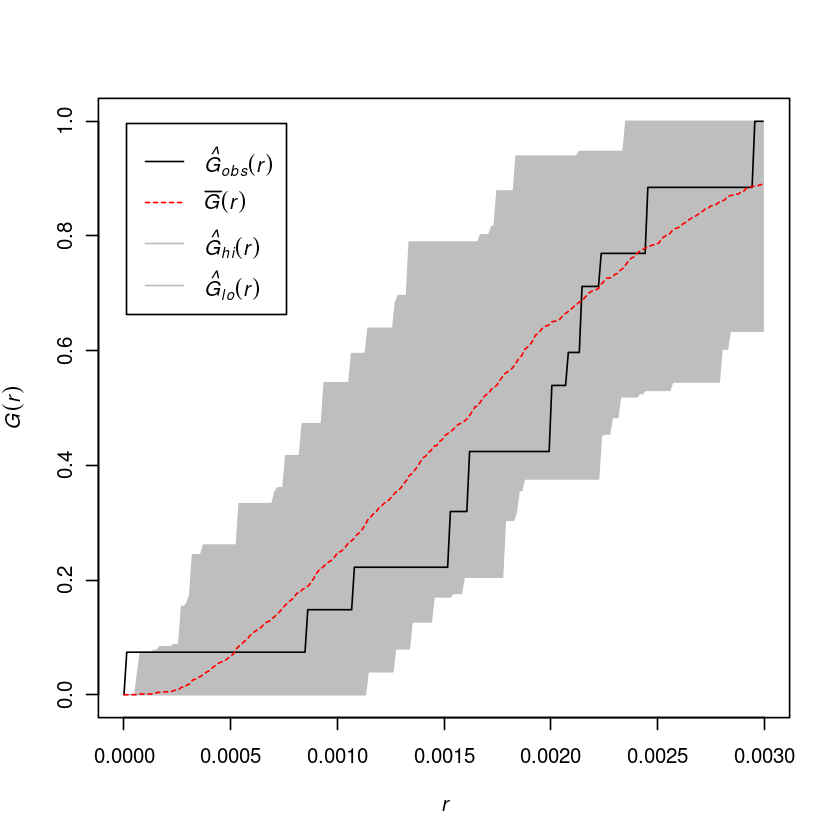

In [24]:
set.seed(123)

# Number points
n = cp2$n

# Redwood window
cp_rr = ppp(cp2$x, cp2$y, window = ripras(cp2))

# Creating multiple random point patterns with n points and within the redwood seedling window
ex = expression(runifpoint(n, win = ripras(cp2)))

# Calculate the upper and lower boundaries
res2 = envelope(cp_rr, Gest, nsim = 99, simulate = ex, verbose = FALSE, saveall = TRUE)

plot(res2, xlim = c(0, 0.003),main="중마동 추천 충전소 추가 후")